In [1]:
import pandas as pd

In [2]:
train_features = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit4/DS-Unit-4-Sprint-1-Tree-Ensembles/ds1-tree-ensembles/train_features.csv')
train_features.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,46723,NaN,4500,4500,36 months,7.21%,139.38,A,A3,Accounts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,24878,NaN,12000,12000,36 months,9.44%,384.06,B,B1,Client Processing Associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,39038,NaN,12000,12000,36 months,22.35%,460.47,D,D5,Construction Operator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


In [4]:
train_features.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
count,37745.000000,0.0,37745.000000,37745.000000,37745,37745,37745.000000,37745,37745,34180,...,4738.000000,4738.000000,4738.000000,4639.000000,4738.000000,4738.000000,4738.000000,4738.000000,1668.000000,37745
unique,NaN,NaN,NaN,NaN,2,110,NaN,7,35,16269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,36 months,11.98%,NaN,B,B5,Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
freq,NaN,NaN,NaN,NaN,27480,787,NaN,10304,2193,630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35303
mean,33579.507193,NaN,14913.304411,14913.304411,NaN,NaN,444.702933,NaN,NaN,NaN,...,0.724567,1.736809,11.296117,55.261199,2.855424,12.897425,0.048333,0.073660,36.332134,NaN
std,13609.172414,NaN,10153.364841,10153.364841,NaN,NaN,293.571158,NaN,NaN,NaN,...,1.068437,1.867062,6.557512,26.967270,3.054911,8.512730,0.455754,0.330458,24.058143,NaN
min,10000.000000,NaN,1000.000000,1000.000000,NaN,NaN,30.120000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,21824.000000,NaN,7000.000000,7000.000000,NaN,NaN,222.990000,NaN,NaN,NaN,...,0.000000,0.000000,7.000000,35.350000,1.000000,7.000000,0.000000,0.000000,15.000000,NaN
50%,33603.000000,NaN,12000.000000,12000.000000,NaN,NaN,361.500000,NaN,NaN,NaN,...,0.000000,1.000000,10.000000,57.300000,2.000000,11.000000,0.000000,0.000000,34.000000,NaN
75%,45357.000000,NaN,20000.000000,20000.000000,NaN,NaN,610.170000,NaN,NaN,NaN,...,1.000000,3.000000,15.000000,76.900000,4.000000,17.000000,0.000000,0.000000,57.000000,NaN


In [11]:
#Drop columns with majority NaN value

# train_features = train_features.drop(['member_id','url','desc','revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths',
#         'sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts',
#         'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog'
#         ], axis=1)

train_features.isna().sum()


id                                    0
loan_amnt                             0
funded_amnt                           0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          3565
emp_length                         3277
home_ownership                        0
annual_inc                            0
purpose                               0
title                                 0
zip_code                              0
addr_state                            0
dti                                  92
delinq_2yrs                           0
earliest_cr_line                      0
inq_last_6mths                        0
mths_since_last_delinq            20881
mths_since_last_record            32170
open_acc                              0
pub_rec                               0
revol_bal                             0


In [30]:
train_features = train_features.dropna(axis=1)
train_features.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'purpose',
       'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30

In [12]:
train_labels = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit4/DS-Unit-4-Sprint-1-Tree-Ensembles/ds1-tree-ensembles/train_labels.csv')
train_labels.head()


,id,charged_off
0,43373,0
1,24414,0
2,46723,0
3,24878,0
4,39038,0


In [36]:
test_features = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit4/DS-Unit-4-Sprint-1-Tree-Ensembles/ds1-tree-ensembles/test_features.csv')
test_features = test_features[['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'purpose',
       'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'disbursement_method']]


In [19]:
from sklearn.tree import DecisionTreeClassifier

X = pd.get_dummies(train_features)
y = train_labels['charged_off']

dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
lr.score(X, y)

0.8526162405616639

In [22]:
pd.Series(lr.coef_[0], X.columns).sort_values().plot.barh(color='grey');

In [23]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(train_features)
y = train_labels['charged_off']

dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

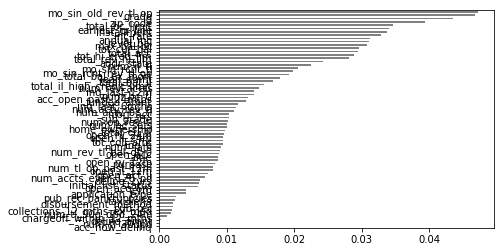

In [24]:
pd.Series(dt.feature_importances_, X.columns).sort_values().plot.barh(color='grey');

In [47]:
x_test = encoder.fit_transform(test_features)
y_pred = dt.predict(x_test)

In [49]:
y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(x_test['id'])

pass1 = ids.join(y_pred_df)

pass1.rename(columns={0:'charged_off'}, 
                 inplace=True)

pass1.set_index('id')

pass1.describe()

pass1.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit4/DS-Unit-4-Sprint-1-Tree-Ensembles/pass1.csv',index=False)


In [25]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
lr.score(X, y)

#Just barely worse than with one-hot

0.8525367598357398

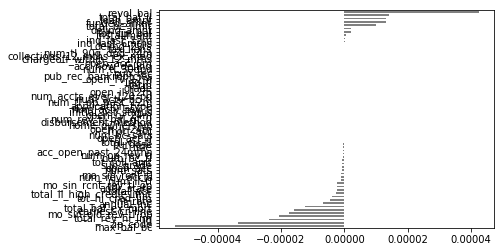

In [26]:
pd.Series(lr.coef_[0], X.columns).sort_values().plot.barh(color='grey');